In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("white")

### Tính toán kết quả dự báo và dữ liệu thật

In [27]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score

def Static_score_model_class(y,y_pred,aver=None):
    accuracy = accuracy_score(y,y_pred)
    precision = precision_score(y,y_pred,average=aver)
    recall = recall_score(y,y_pred,average=aver)
    f1 = f1_score(y,y_pred,average=aver)
    return accuracy, recall, precision, f1


### Trực quan hóa

In [28]:
def Visualize_confusion_matrix(y,y_pred):
    cm = confusion_matrix(y, y_pred)
    cm_df = pd.DataFrame(cm)
    plt.figure(figsize=(6,5))
    sns.heatmap(cm_df, annot=True,fmt='g',cmap='Blues')
    plt.title('Accuracy:{0:.3f}'.format(accuracy_score(y,y_pred)))
    plt.ylabel('True Values')
    plt.xlabel('Predicted Values')
    plt.show()
    return


In [29]:
# Nếu có nhiều hơn 2 thuộc tính X thì phải dùng PCA để giảm xuống còn 2
def Visualize_data(X1,X2,y,title):
    plt.figure(figsize=(6,5))
    sns.scatterplot(X1 , X2,hue=y,cmap='Sequential')
    plt.title(title)
    plt.show()
    return


In [30]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
def ROC_AUC(y,y_prob):
    # calculate roc curves
    fpr, tpr, threshold = roc_curve(y, y_prob)
    # calculate scores
    model_auc = roc_auc_score(y, y_prob)
    # plot the roc curve for the model
    plt.plot([0,1], [0,1], linestyle='--', label='No Skill' )
    plt.plot(fpr, tpr, marker='.', label='Model - AUC=%.3f' %  (model_auc))
    # show axis labels and the legend
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.show(block=False)
    return
# Dùng cho dữ liệu balance


In [41]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
def Precision_Recall_AUC(y,y_prob):
    # calculate roc curves
    precision, recall, threshold = precision_recall_curve(y, y_prob)
    # calculate scores
    model_auc = auc(recall, precision)
    
    # plot the roc curve for the model
    ns=len(y[y==1])/len(y)
    plt.plot([0,1], [ns,ns], linestyle='--', label='No Skill' )
    plt.plot(recall, precision, marker='.', label='Model - AUC=%.3f' %  (model_auc))
    
    # show axis labels and the legend
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.legend()
    plt.show()
    return

### Xác định ngưỡng tối ưu

In [3]:
def Threshold_PrecisionRecall(y,y_prob):
    # calculate roc curves
    precision, recall, threshold = precision_recall_curve(y, y_prob)
    scores= (2 * precision * recall)/(precision + recall) 
    pos= np.argmax(scores)
    return threshold[pos],scores[pos]


In [4]:
def Threshold_ROC(y,y_prob):
    # calculate roc curves
    fpr, tpr, threshold = roc_curve(y, y_prob)
    scores=tpr-fpr
    pos= np.argmax(scores)
    return threshold[pos],scores[pos]
#scores được tính linh động tùy theo nhu cầu

In [5]:
import pickle

def Save_object(obj,filename):
    with open(filename, 'wb') as file:
        pickle.dump(obj,filename)
    return

### Kiểm tra hàm định nghĩa

In [32]:
# df = pd.read_csv('Data/Test_data1.csv')
# df.head()

,Actual Value,Predict Value,Probality
0,0,0,0.114713
1,0,0,0.141124
2,0,0,0.172431
3,0,0,0.208993
4,0,0,0.250956


In [33]:
# score, recall, precision, f1 = Static_score_model_class(df['Actual Value'],df['Predict Value'],'micro')
# print('Score:', score)
# print('Recall:', recall)
# print('Precision:', precision)
# print('f1:', f1)


Score: 0.8
Recall: 0.8
Precision: 0.8
f1: 0.8000000000000002


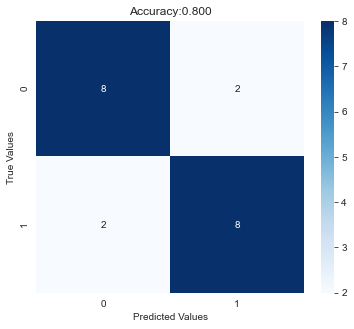

In [34]:
# Visualize_confusion_matrix(df['Actual Value'],df['Predict Value'])

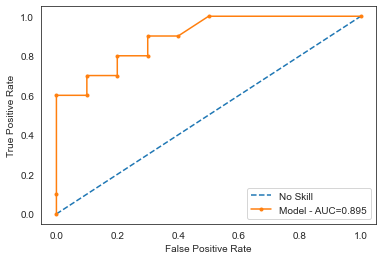

In [35]:
# ROC_AUC(df['Actual Value'],df['Probality'])

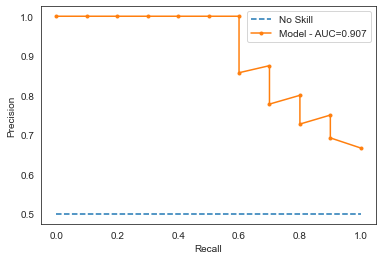

In [42]:
# Precision_Recall_AUC(df['Actual Value'],df['Probality'])